In [17]:
%load_ext autoreload
%autoreload 2 

In [18]:
from fat_tree import FatTree

# Generación de la topologia

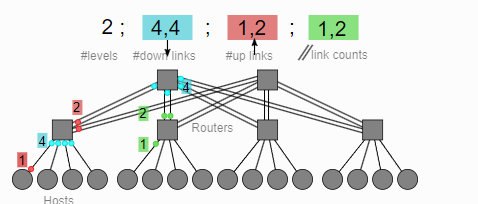

Primer paso es generar el Fat Tree a utilizar en la plataforma. La clase ´FatTree´ recibe los siguientes parametros:

- levels: Int
- Down links: list[int]
- Up links: list[int]
- Link Count: list[int]
- Debug: Bool


In [19]:
arqui1 = FatTree(2,[4,4],[1,2],[1,2])

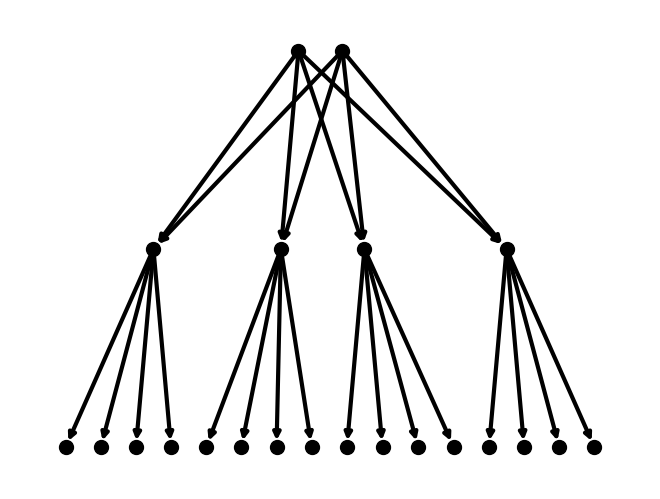

In [20]:
arqui1.draw()

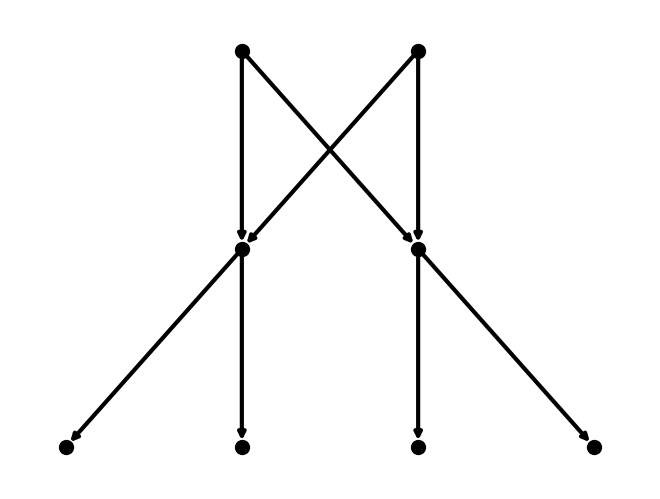

In [21]:
arqui2 = FatTree(2,[2,2],[1,2],[1,1])
arqui2.draw()

# Selecting the hw specs

Despues de generar el fat tree,

1. node_types.json
2.


## DFVS

attributes

- speed: Computational power (per core, in flop/s). **If you use DVFS, provide a comma-separated list of values for each pstate**
- pstate

properties

- wattage_per_state
- wattage_off
- sleep_pstates


In [22]:
import json
import random

def generate_cloud_nodes(number_of_nodes):
    # Define some possible attributes for the cloud nodes
    speeds = ["1.0Gf", "2.0Gf", "3.0Gf", "1.5Gf"]  # Speeds in GigaFLOPS
    pstate = "0"  # Assuming pstate "0" indicates a standard operating state
    
    # Create a dictionary with node names as keys and their attributes as values
    nodes = {f"node_C{i+1}": {
                "attributes": {
                    "speed": random.choice(speeds),
                    "pstate": pstate,
                }
             } for i in range(number_of_nodes)}
    
    # Convert the nodes dictionary to a JSON format
    cloud_nodes_json = json.dumps(nodes, indent=4)
    return cloud_nodes_json

# Example usage: Generate JSON for 5 heterogeneous cloud nodes
# Write file to disk
with open("node_types.json", "w") as f:
    f.write(generate_cloud_nodes(5))

In [23]:
%%writefile network_types.json
{

}

Overwriting network_types.json


In [24]:
%%writefile test02.json
{
    "nodes": [
        { "type": "node_C1", "number": 1 },
        { "type": "node_C2", "number": 1 },
        { "type": "node_C3", "number": 1 },
        { "type": "node_C4", "number": 1 },
    ],
    "cluster_network": "Network A",
    "dc_network": "Network A"
}

Overwriting test02.json


In [25]:
from hw_specs import PlatformSpecs

In [32]:
PLATFORM_IN  = "test02.json"
PLATFORM_OUT = "generated2.xml"

iface =  PlatformSpecs(PLATFORM_IN, PLATFORM_OUT)
iface.export(arqui2)

In [33]:
!cat generated2.xml

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE platform
  SYSTEM 'https://simgrid.org/simgrid.dtd'>
<platform version="4.1">
    <zone id="main" routing="Full">
        <zone id="cluster_compute" routing="Full">
            <host speed="1.5Gf" pstate="0" id="c0"/>
            <host speed="3.0Gf" pstate="0" id="c1"/>
            <host speed="1.5Gf" pstate="0" id="c2"/>
            <host speed="2.0Gf" pstate="0" id="c3"/>
            <router id="r10"/>
            <router id="r11"/>
            <router id="r20"/>
            <router id="r21"/>
            <router id="router_master"/>
            <link bandwidth="1.25GBps" latency="500us" id="r20-r10-uplink0"/>
            <link bandwidth="1.25GBps" latency="500us" id="r20-r10-downlink0"/>
            <link bandwidth="1.25GBps" latency="500us" id="r10-c0-uplink0"/>
            <link bandwidth="1.25GBps" latency="500us" id="r10-c0-downlink0"/>
            <link bandwidth="1.25GBps" latency="500us" id="router_master-r20-uplink0"/>
       